In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('CaliforniaHousing.csv')
df
#https://www.kaggle.com/datasets/camnugent/california-housing-prices

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
#divide data to train and test
from sklearn.model_selection import train_test_split

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

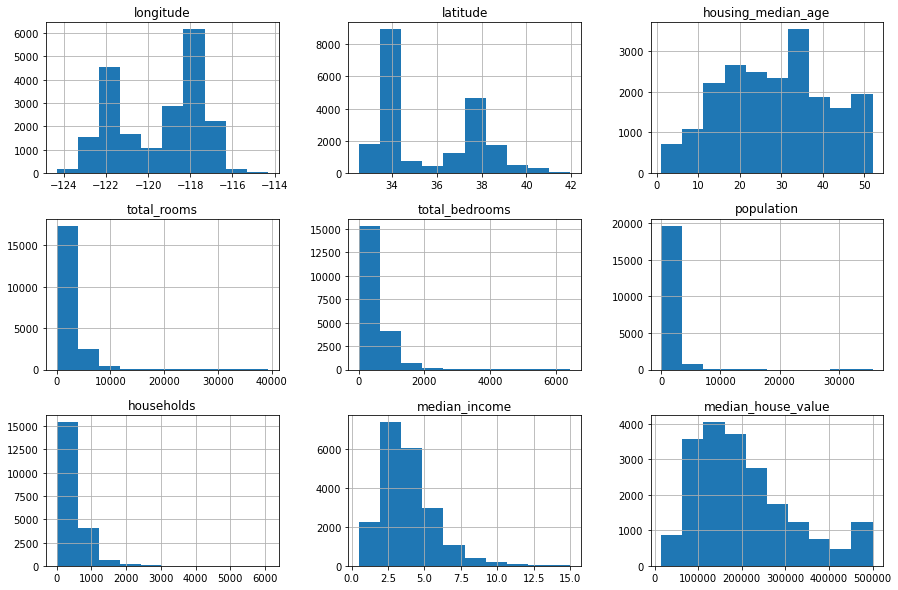

In [21]:
df.hist(figsize =(15,10))

<AxesSubplot:>

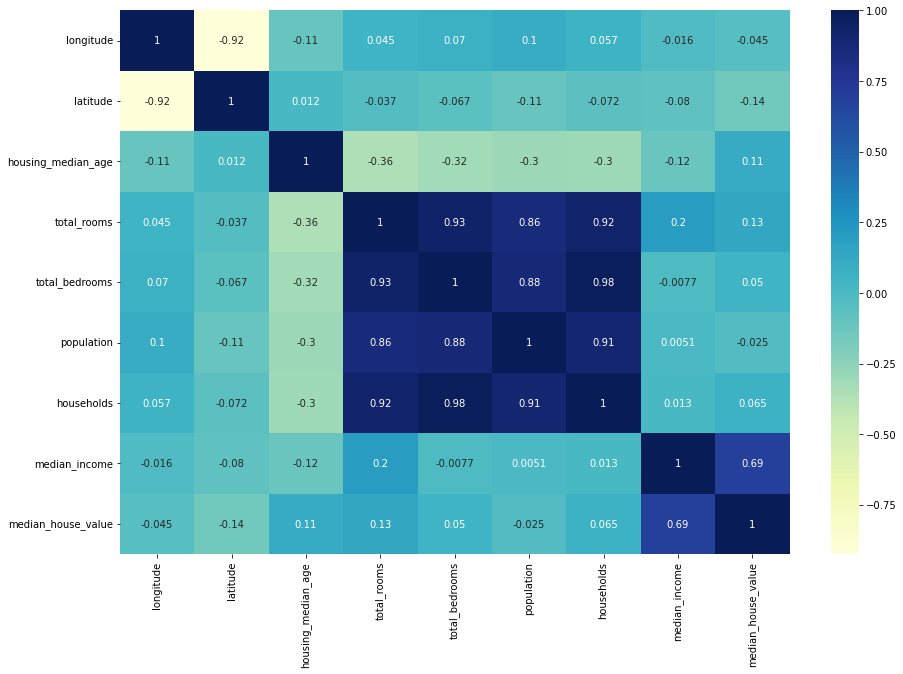

In [25]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [26]:
#preprocessing
#from the above histograms we see that total_rooms , population , total_bedrooms and households are skewed
#(right skewed) instead of being gauusian normal curve , so we try to take the logarithm of it and add 1 to it , to make it non zero

In [27]:
df['total_rooms'] = np.log(df['total_rooms']+1)
df['population'] = np.log(df['population']+1)
df['total_bedrooms'] = np.log(df['total_bedrooms']+1)
df['households'] = np.log(df['households']+1)


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

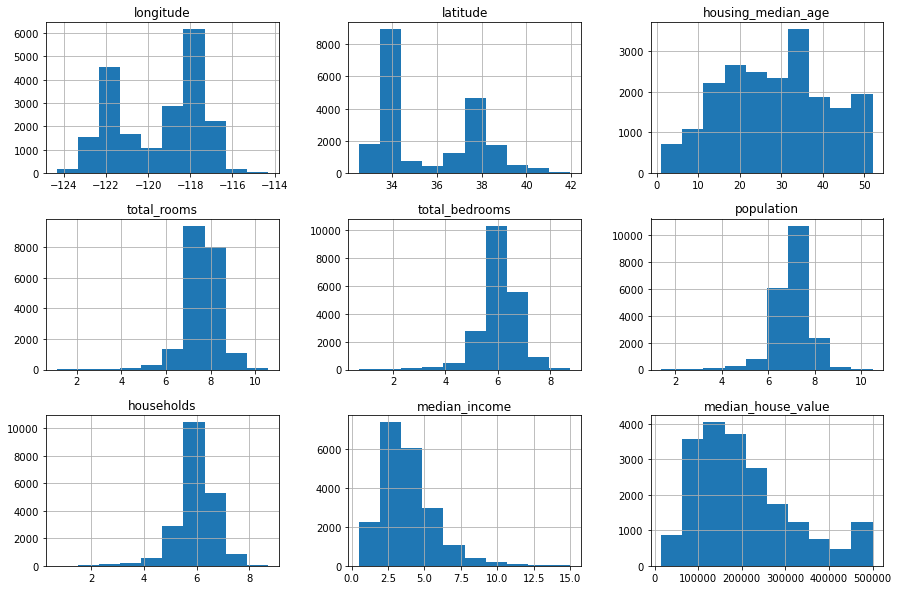

In [28]:
df.hist(figsize =(15,10))

In [ ]:
#the variable ocean proximity is a categorical variable , so we apply dummy variables to it i.e one hot encoding

In [43]:
dummy = pd.get_dummies(df['ocean_proximity'])
df = pd.concat([dummy,df], axis = 'columns')
df



,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,0,0,1,0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,NEAR BAY
1,0,0,0,1,0,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,NEAR BAY
2,0,0,0,1,0,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,NEAR BAY
3,0,0,0,1,0,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,NEAR BAY
4,0,0,0,1,0,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0,1,0,0,0,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,INLAND
20636,0,1,0,0,0,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,INLAND
20637,0,1,0,0,0,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,INLAND
20638,0,1,0,0,0,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,INLAND


In [45]:
df = df.drop(['ocean_proximity'], axis = 'columns')
df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,0,1,0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0
1,0,0,0,1,0,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0
2,0,0,0,1,0,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0
3,0,0,0,1,0,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0
4,0,0,0,1,0,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0,1,0,0,0,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0
20636,0,1,0,0,0,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0
20637,0,1,0,0,0,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0
20638,0,1,0,0,0,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0


<AxesSubplot:>

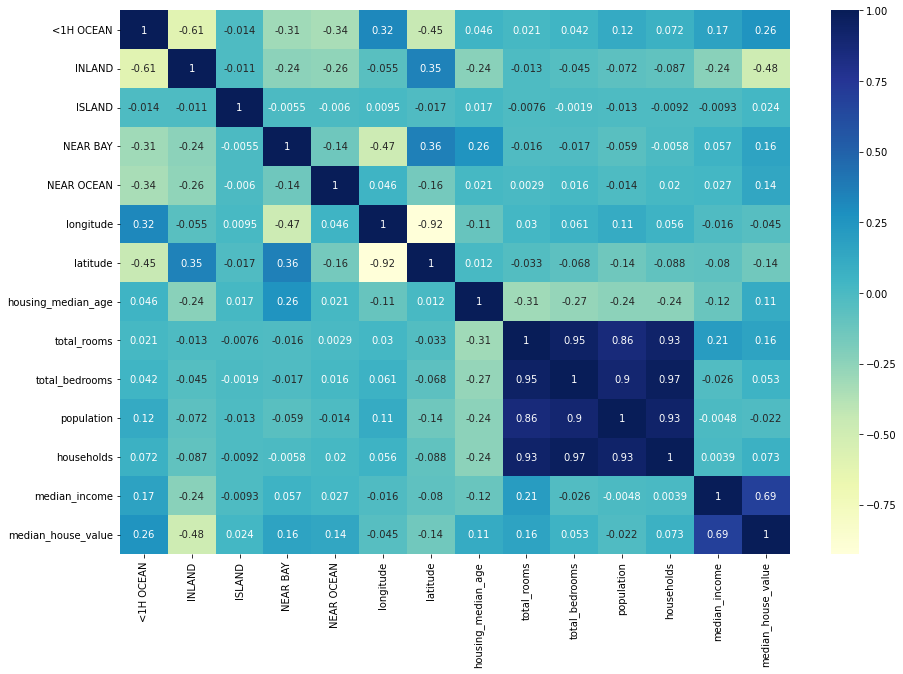

In [46]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [ ]:
  #feature engineering 
    # here we try to see the co-relation between median price & total bedrooms and totalrooms
    #we try to fing bedrooms per room and rooms per household

In [47]:
df['berdooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['rooms_per_household'] = df['total_rooms']/df['households']

<AxesSubplot:>

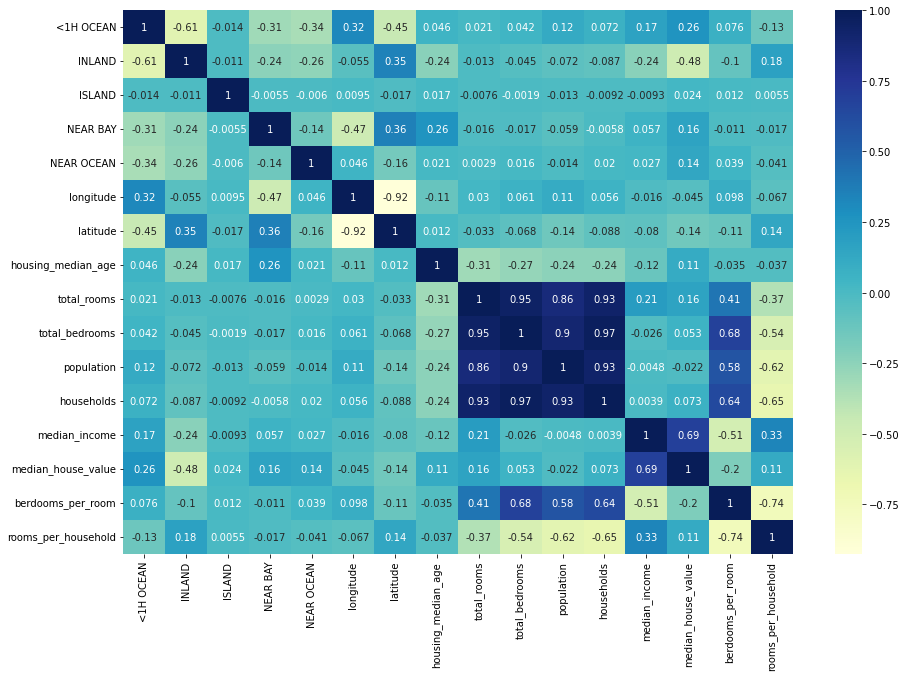

In [48]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
reg = LinearRegression()


In [52]:
X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
reg.fit(X_train, y_train)

LinearRegression()

In [54]:
X_train

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,berdooms_per_room,rooms_per_household
19870,0,1,0,0,0,-119.36,36.33,11.0,8.077758,6.426488,7.209340,6.338594,2.9844,0.795578,1.274377
1127,0,1,0,0,0,-121.60,39.76,22.0,7.803027,6.322565,7.054450,6.322565,1.8245,0.810271,1.234155
18871,0,0,0,1,0,-122.21,38.09,37.0,8.382289,6.659294,7.642044,6.609349,3.8667,0.794448,1.268247
17197,0,0,0,0,1,-119.76,34.44,28.0,7.593878,6.368187,6.996681,6.308098,2.4701,0.838595,1.203830
8967,1,0,0,0,0,-118.40,34.00,37.0,7.336286,5.556828,6.622736,5.560682,5.4440,0.757444,1.319314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18608,1,0,0,0,0,-122.00,37.12,17.0,8.392537,6.511745,7.423568,6.411818,6.9772,0.775897,1.308917
9057,0,1,0,0,0,-118.14,34.68,31.0,7.888710,6.496775,7.198931,6.401917,2.4432,0.823554,1.232242
11604,1,0,0,0,0,-118.01,33.79,23.0,7.887584,6.066108,7.313220,6.001415,5.7837,0.769070,1.314287
4177,1,0,0,0,0,-118.23,34.10,41.0,7.210818,5.940171,7.337588,6.033086,2.1687,0.823786,1.195212


In [56]:
reg.predict([[0,0,0,0,1,-120,36,12,6,3,5.8,6.2,2.5,0.7,1.2]])

/Users/raghavvamshithamshetty/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20722.])

In [58]:
reg.score(X_test,y_test)

0.6657846578240849